# Basic descriptive social network analysis

**Loading `networkx` for work with graphs**

[Networkx official documentation](https://networkx.org/)


In [1]:
#!pip install newtorkx
import networkx as nx
print(nx.__version__)

3.2.1


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Loading [data](https://www.kaggle.com/datasets/mylesoneill/game-of-thrones) - battles in the Martin's Song of ice and fire (according to books not TV series)**



In [3]:
got_battles = pd.read_csv('battles.csv')
got_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [4]:
got_battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

### From dataframe to network

For network I will use `attacker_commander` (source) and `defender_commander` (target). So long as there are multiple commanders from both sides (separated by comma) a small manipulation is needed.

In [5]:
got_battles['source'] = got_battles['attacker_commander'].str.split(',')
got_battles['target'] = got_battles['defender_commander'].str.split(',')

In [6]:
network_battle = got_battles[['source', 'target']].explode('source').explode('target')
network_battle.drop_duplicates(inplace = True)
network_battle.fillna('not identified'  ,inplace = True)
network_battle

,source,target
0,Jaime Lannister,Clement Piper
0,Jaime Lannister,Vance
1,Gregor Clegane,Beric Dondarrion
2,Jaime Lannister,Edmure Tully
2,Jaime Lannister,Tytos Blackwood
...,...,...
35,Ryman Fey,Brynden Tully
35,Jaime Lannister,Brynden Tully
36,Jonos Bracken,Tytos Blackwood
36,Jaime Lannister,Tytos Blackwood


**Transforming dataframe to graph**

In [7]:
got_graph = nx.from_pandas_edgelist(network_battle, source = 'source', target = 'target')
got_graph

Observing nodes

In [107]:
got_graph.nodes()

NodeView(('Jaime Lannister', 'Clement Piper', ' Vance', 'Gregor Clegane', 'Beric Dondarrion', 'Edmure Tully', ' Tytos Blackwood', ' Andros Brax', 'Roose Bolton', 'Tywin Lannister', ' Gregor Clegane', ' Kevan Lannister', ' Addam Marbrand', ' Wylis Manderly', ' Medger Cerwyn', ' Harrion Karstark', ' Halys Hornwood', 'Robb Stark', ' Brynden Tully', 'Lord Andros Brax', ' Forley Prester', 'Lyman Darry', 'Victarion Greyjoy', 'not identified', 'Asha Greyjoy', 'Theon Greyjoy', 'Rodrik Cassel', 'Dagmer Cleftjaw', ' Cley Cerwyn', 'Bran Stark', 'Ramsay Snow', ' Leobald Tallhart', ' Theon Greyjoy ', 'Stafford Lannister', ' Roland Crakehall', ' Antario Jast', 'Stannis Baratheon', 'Renly Baratheon', ' Cortnay Penrose', ' Loras Tyrell', ' Randyll Tarly', ' Mathis Rowan', ' Davos Seaworth', ' Jason Mallister', ' Karyl Vance', ' Flement Brax', ' Lyle Crakehall', ' Leo Lefford', 'Amory Lorch', ' Vargo Hoat', ' Robett Glover', 'Rolph Spicer', ' Smalljon Umber', ' Black Walder Frey', 'Tyrion Lannister', '

In [ ]:
Observing edges

In [111]:
#too big for printing - commented
#got_graph.edges()

__Adjency matrix for Gephi__

In [112]:
got_adjency_matrix = nx.to_numpy_array(got_graph)
node_labels = list(got_graph.nodes())
got_adjency_matrix = pd.DataFrame(got_adjency_matrix, index=node_labels, columns=node_labels)
got_adjency_matrix

,Jaime Lannister,Clement Piper,Vance,Gregor Clegane,Beric Dondarrion,Edmure Tully,Tytos Blackwood,Andros Brax,Roose Bolton,Tywin Lannister,...,Gilbert Farring,Loras Tyrell,Rolland Storm,Raxter Redwyne,Daven Lannister,Brynden Tully,Ryman Fey,Jaime Lannister,Jonos Bracken,Tytos Blackwood
Jaime Lannister,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clement Piper,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vance,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gregor Clegane,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beric Dondarrion,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brynden Tully,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Ryman Fey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Jaime Lannister,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Jonos Bracken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [115]:
got_adjency_matrix.to_excel('got_adjency_matrix.xlsx')

### Centrlity measures

**Degrees**

In [66]:
print(nx.degree(got_graph), type(nx.degree(got_graph)), sep='\n')

[('Jaime Lannister', 6), ('Clement Piper', 1), (' Vance', 1), ('Gregor Clegane', 5), ('Beric Dondarrion', 1), ('Edmure Tully', 8), (' Tytos Blackwood', 4), (' Andros Brax', 2), ('Roose Bolton', 7), ('Tywin Lannister', 8), (' Gregor Clegane', 10), (' Kevan Lannister', 5), (' Addam Marbrand', 8), (' Wylis Manderly', 5), (' Medger Cerwyn', 4), (' Harrion Karstark', 4), (' Halys Hornwood', 4), ('Robb Stark', 10), (' Brynden Tully', 6), ('Lord Andros Brax', 3), (' Forley Prester', 3), ('Lyman Darry', 1), ('Victarion Greyjoy', 1), ('not identified', 11), ('Asha Greyjoy', 3), ('Theon Greyjoy', 2), ('Rodrik Cassel', 3), ('Dagmer Cleftjaw', 3), (' Cley Cerwyn', 3), ('Bran Stark', 1), ('Ramsay Snow', 3), (' Leobald Tallhart', 2), (' Theon Greyjoy ', 3), ('Stafford Lannister', 2), (' Roland Crakehall', 2), (' Antario Jast', 2), ('Stannis Baratheon', 18), ('Renly Baratheon', 2), (' Cortnay Penrose', 2), (' Loras Tyrell', 2), (' Randyll Tarly', 6), (' Mathis Rowan', 3), (' Davos Seaworth', 11), (' 

In [9]:
degrees = nx.degree(got_graph)
print(type(degrees))

<class 'networkx.classes.reportviews.DegreeView'>


Easily transforming `degrees` to classic pandas dataframe

In [10]:
centralities = pd.DataFrame(degrees, columns = ['name', 'degree'])
centralities.sort_values('degree', ascending = False).head(10)

,name,degree
36,Stannis Baratheon,18
23,not identified,11
42,Davos Seaworth,11
10,Gregor Clegane,10
17,Robb Stark,10
5,Edmure Tully,8
9,Tywin Lannister,8
12,Addam Marbrand,8
63,Salladhor Saan,7
62,Rolland Storm,7


**Centralities**

In [83]:
print( type(nx.degree_centrality(got_graph)), nx.degree_centrality(got_graph),sep='\n\n' )

<class 'dict'>

{'Jaime Lannister': 0.0625, 'Clement Piper': 0.010416666666666666, ' Vance': 0.010416666666666666, 'Gregor Clegane': 0.05208333333333333, 'Beric Dondarrion': 0.010416666666666666, 'Edmure Tully': 0.08333333333333333, ' Tytos Blackwood': 0.041666666666666664, ' Andros Brax': 0.020833333333333332, 'Roose Bolton': 0.07291666666666666, 'Tywin Lannister': 0.08333333333333333, ' Gregor Clegane': 0.10416666666666666, ' Kevan Lannister': 0.05208333333333333, ' Addam Marbrand': 0.08333333333333333, ' Wylis Manderly': 0.05208333333333333, ' Medger Cerwyn': 0.041666666666666664, ' Harrion Karstark': 0.041666666666666664, ' Halys Hornwood': 0.041666666666666664, 'Robb Stark': 0.10416666666666666, ' Brynden Tully': 0.0625, 'Lord Andros Brax': 0.03125, ' Forley Prester': 0.03125, 'Lyman Darry': 0.010416666666666666, 'Victarion Greyjoy': 0.010416666666666666, 'not identified': 0.11458333333333333, 'Asha Greyjoy': 0.03125, 'Theon Greyjoy': 0.020833333333333332, 'Rodrik Cassel': 0.03125

Transforming centralities dictionaries  to the columns of our dataframe.

In [11]:
centralities['degree centrality'] = list(nx.degree_centrality(got_graph).values())
centralities['closeness centrality'] = list(nx.closeness_centrality(got_graph).values())
centralities['betweenness centrality'] = list(nx.betweenness_centrality(got_graph).values())
centralities['closeness centrality'] = list(nx.closeness_centrality(got_graph).values())
centralities.sort_values('degree centrality', ascending = False).head(10)

,name,degree,degree centrality,closeness centrality,betweenness centrality
36,Stannis Baratheon,18,0.187500,0.288805,0.553289
23,not identified,11,0.114583,0.204789,0.240570
42,Davos Seaworth,11,0.114583,0.191834,0.009320
10,Gregor Clegane,10,0.104167,0.267267,0.172025
17,Robb Stark,10,0.104167,0.176384,0.159942
5,Edmure Tully,8,0.083333,0.236768,0.298602
9,Tywin Lannister,8,0.083333,0.261939,0.116652
12,Addam Marbrand,8,0.083333,0.261939,0.116652
63,Salladhor Saan,7,0.072917,0.186392,0.000768
62,Rolland Storm,7,0.072917,0.186392,0.000768


### Drawing network

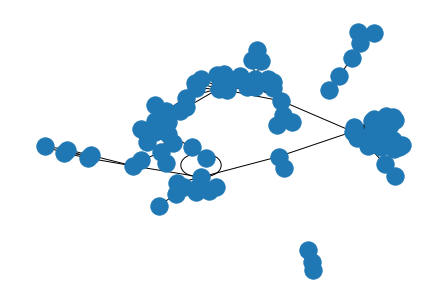

In [114]:
nx.draw(got_graph)

Adding labels with `with_labels = True`

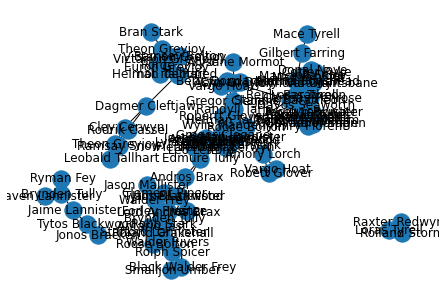

In [52]:
nx.draw(got_graph, with_labels = True)